In [316]:
import pandas as pd
import os
import tensorflow as tf
import matplotlib.pyplot as plt

from src import data_proc
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Load Data

In [324]:
load_data_path = "../data/raw_data/load_hist.csv"
temp_data_path = '../data/raw_data/temp_hist.csv'

load_data_raw = pd.read_csv(load_data_path, parse_dates=[0])
temp_data_raw = pd.read_csv(temp_data_path, parse_dates=[0])
# print(load_data_raw.Date[0])

# view_n = 3
# # print(temp_data_raw.head(view_n), '\n', load_data_raw.head(view_n))
# # print(temp_data_raw.shape, load_data_raw.shape)

temp_data_raw.columns = ['date', 'hr', 'station_id', 'temperature']
load_data_raw.columns = ['date', 'hr', 'load']


# temp_data_raw['datetime'] = temp_data_raw.date + pd.to_timedelta(temp_data_raw.hr, unit='h')
# load_data_raw['datetime'] = load_data_raw.date + pd.to_timedelta(load_data_raw.hr, unit='h')
# print(temp_data_raw.datetime.value_counts())
temp_data_raw = temp_data_raw[temp_data_raw.date < '2008']
temp_data_raw.tail(2)

,date,hr,station_id,temperature
973006,2007-12-31,23,28,42
973007,2007-12-31,24,28,37


In [325]:
load_data_raw

,date,hr,load
0,2005-01-01,1,156.545
1,2005-01-01,2,147.924
2,2005-01-01,3,141.037
3,2005-01-01,4,139.125
4,2005-01-01,5,140.482
...,...,...,...
26275,2007-12-31,20,263.432
26276,2007-12-31,21,256.101
26277,2007-12-31,22,248.752
26278,2007-12-31,23,239.556


In [333]:
max_year = 2008
load_data_path = "../data/raw_data/load_hist.csv"
temp_data_path = '../data/raw_data/temp_hist.csv'
load_data_raw = data_proc.get_raw_load_data(load_data_path, max_year=max_year)
temp_data_raw = data_proc.get_raw_temp_data(temp_data_path, max_year=max_year)
temp_data_raw.head(2)

station_id,date,hr,t1,t2,t3,t4,t5,t6,t7,t8,...,t19,t20,t21,t22,t23,t24,t25,t26,t27,t28
0,2005-01-01,1,43,46,40,47,48,46,44,52,...,39,50,43,45,50,47,41,47,47,45
1,2005-01-01,2,41,46,38,46,48,45,51,50,...,41,49,43,46,47,47,45,47,47,45


Each row in the laod data is a load data for a given hour

## Address DST time

In [47]:
# from pytz import timezone
# from datetime import datetime, date, time
# tz = timezone('America/Denver')



# years = pd.unique(load_data_raw.date.dt.year)
# year_dst_dates = {}
# for year in years:
#     trans_dates = []
#     for t in tz._utc_transition_times:
#         if t.year == year:
#             trans_dates.append(t.date())
#     dst_date = max(trans_dates)
    

#     year_dst_dates[year] = dst_date #.strftime("%Y-%m-%d")

# year_dst_dates


# dst_dates = list(year_dst_dates.values())

# dst_dates = [datetime.combine(item, time(hour=2)) for item in dst_dates]

# print(load_data_raw[load_data_raw.datetime.isin(dst_dates)])
# print(temp_data_raw[temp_data_raw.datetime.isin(dst_dates)])

In [125]:
import numpy as np

temp_data_raw['dummy_col_01'] = np.arange(len(temp_data_raw)) % 2

temp_data_pivot = pd.pivot_table(temp_data_raw, values='temperature', index=['date', 'hr','datetime', 'dummy_col_01'], columns='station_id')
temp_data_pivot.reset_index(inplace=True)
temp_data_pivot.drop(labels=['dummy_col_01', 'date', 'hr'], axis=1, inplace=True)
temp_data_pivot.head()
str_temp_cols_dict = dict([( col, 't'+str(col)) for col in temp_data_pivot.columns if isinstance(col, int)])
temp_data_pivot.rename(columns=str_temp_cols_dict, inplace=True)
temp_data_pivot.head(2)

station_id,datetime,t1,t2,t3,t4,t5,t6,t7,t8,t9,...,t19,t20,t21,t22,t23,t24,t25,t26,t27,t28
0,2005-01-01 01:00:00,43,46,40,47,48,46,44,52,45,...,39,50,43,45,50,47,41,47,47,45
1,2005-01-01 02:00:00,41,46,38,46,48,45,51,50,42,...,41,49,43,46,47,47,45,47,47,45


In [49]:
np.all(load_data_raw.datetime == temp_data_pivot.datetime)

True

Due to DST time, some hours are repeated

# Exploratory Analysis

<AxesSubplot:xlabel='datetime'>

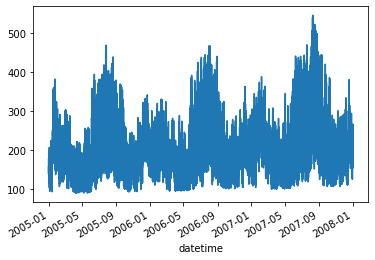

In [50]:
load_data_raw.set_index('datetime').load.plot()

<AxesSubplot:xlabel='datetime'>

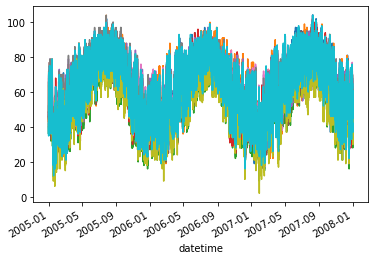

In [51]:
temp_data_pivot.set_index('datetime').iloc[:, :10].plot(legend=False)

## Demand by Time

### Demand by Month of year

<AxesSubplot:xlabel='month', ylabel='load'>

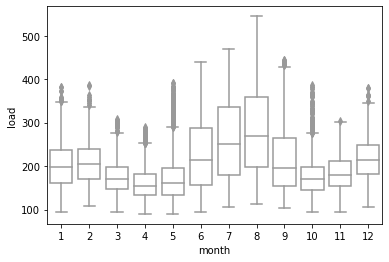

In [52]:
temp_df = (load_data_raw.copy()
           .assign(month = load_data_raw.datetime.dt.month)
           )

import seaborn as sns

sns.boxplot(x='month', y='load', data=temp_df, color='w')

### day of week

<AxesSubplot:xlabel='day_of_wk', ylabel='load'>

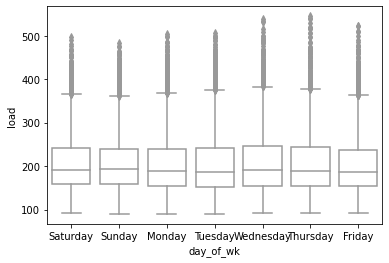

In [53]:
temp_df = (load_data_raw.copy()
           .assign(day_of_wk = load_data_raw.datetime.dt.day_name())
           )

import seaborn as sns

sns.boxplot(x='day_of_wk', y='load', data=temp_df, color='w')

### hour of day

<AxesSubplot:xlabel='hr', ylabel='load'>

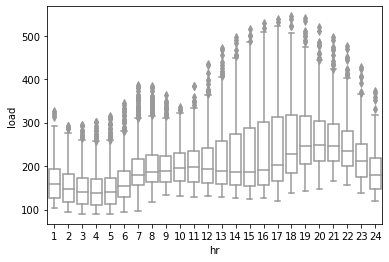

In [54]:


import seaborn as sns

sns.boxplot(x='hr', y='load', data=temp_df, color='w')

#### Weekend?

<AxesSubplot:xlabel='hr', ylabel='load'>

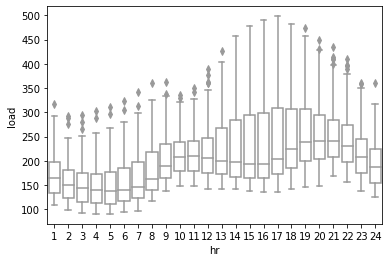

In [55]:
temp_df = (load_data_raw.copy()
           .assign(is_weekend = np.uint8(load_data_raw.datetime.dt.day_of_week > 4))
           .query('is_weekend==1'))


import seaborn as sns

sns.boxplot(x='hr', y='load', data=temp_df, color='w')

## Correlations

### load and temp

<AxesSubplot:xlabel='temp', ylabel='load'>

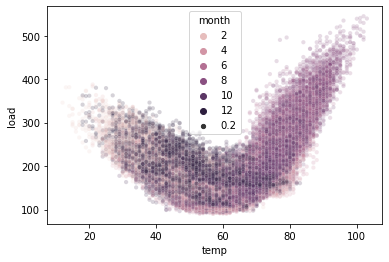

In [56]:
temp_df = (load_data_raw.copy()
           .assign(temp = temp_data_pivot.iloc[:, 4])
           .assign(month = load_data_raw.datetime.dt.month)
           )

sns.scatterplot(x='temp', y='load', data=temp_df, alpha=0.2, size=0.2, hue='month')

### Load and lags
Due to buildings’ thermal inertia, it is important to consider lagged temperatures as well as current temperatures

        date  hr     load            datetime     lag1     lag2     lag7  \
0 2005-01-01   1  156.545 2005-01-01 01:00:00      NaN      NaN      NaN   
1 2005-01-01   2  147.924 2005-01-01 02:00:00  156.545      NaN      NaN   
2 2005-01-01   3  141.037 2005-01-01 03:00:00  147.924  156.545      NaN   
3 2005-01-01   4  139.125 2005-01-01 04:00:00  141.037  147.924  156.545   
4 2005-01-01   5  140.482 2005-01-01 05:00:00  139.125  141.037  147.924   

   lag24  
0    NaN  
1    NaN  
2    NaN  
3    NaN  
4    NaN  


<AxesSubplot:xlabel='lag24', ylabel='load'>

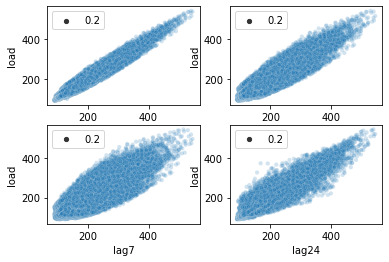

In [57]:
temp_df = (load_data_raw.copy()
           .assign(lag1=load_data_raw.load.shift(1))
           .assign(lag2=load_data_raw.load.shift(2))
           .assign(lag7=load_data_raw.load.shift(3))
           .assign(lag24=load_data_raw.load.shift(24))
           )

print(temp_df.head())

fig, axs = plt.subplots(2,2)

sns.scatterplot(x='lag1', y='load', data=temp_df, alpha=0.2, size=0.2, ax=axs[0,0])
sns.scatterplot(x='lag2', y='load', data=temp_df, alpha=0.2, size=0.2, ax=axs[0,1])
sns.scatterplot(x='lag7', y='load', data=temp_df, alpha=0.2, size=0.2, ax=axs[1,0])
sns.scatterplot(x='lag24', y='load', data=temp_df, alpha=0.2, size=0.2, ax=axs[1,1])

### load and daylight

In [58]:
def hours_of_daylight(date, axis=23.44, latitude=35.76):
    """Compute the hours of daylight for the given date"""
    diff = date - pd.datetime(2000, 12, 21)
    day = diff.total_seconds() / 24. / 3600
    day %= 365.25
    m = 1. - np.tan(np.radians(latitude)) * np.tan(np.radians(axis) * np.cos(day * np.pi / 182.625))
    m = max(0, min(m, 2))
    return 24. * np.degrees(np.arccos(1 - m)) / 180.

temp_df = (load_data_raw.copy()
           .assign(daylight_hrs= load_data_raw.datetime.apply(hours_of_daylight)))


# sns.lineplot('daylight_hrs', data=temp_df)

C:\Users\Aroge\AppData\Local\Temp\ipykernel_38920\3419474934.py:3: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  diff = date - pd.datetime(2000, 12, 21)


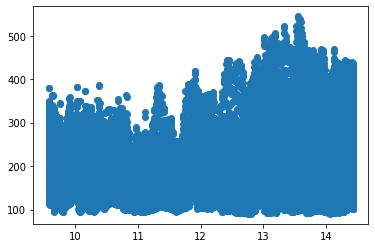

In [59]:
plt.scatter(temp_df.daylight_hrs, temp_df.load)

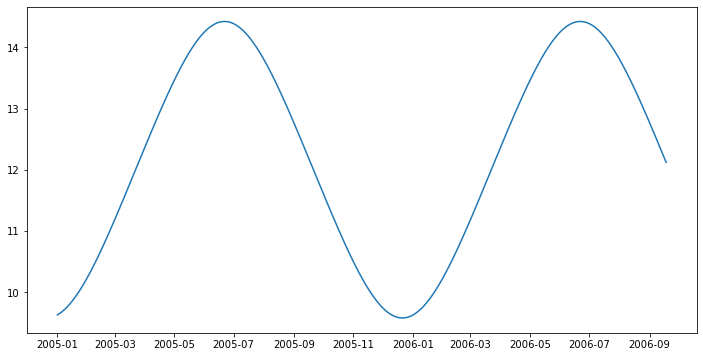

In [60]:
fig, ax = plt.subplots(figsize=(12, 6))
plt.plot(temp_df.datetime[:15000], temp_df.daylight_hrs[:15000])

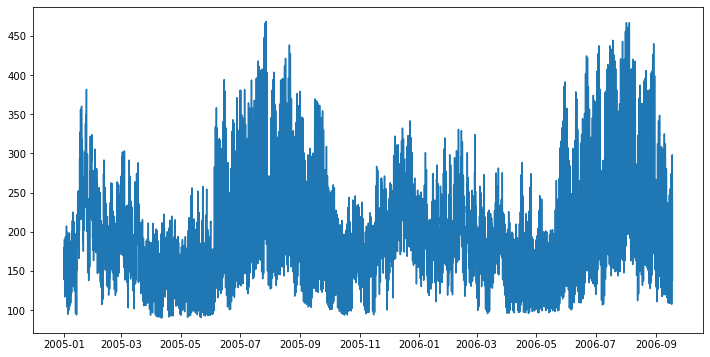

In [61]:
fig, ax = plt.subplots(figsize=(12, 6))
plt.plot(temp_df.datetime[:15000], temp_df.load[:15000])

## Check temeprature data importance

c:\Users\Aroge\anaconda3\envs\t-series-tf\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Aroge\anaconda3\envs\t-series-tf\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


<AxesSubplot:>

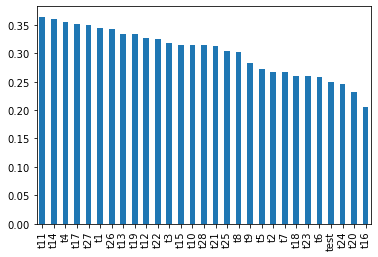

In [62]:
temp_cols = list(str_temp_cols_dict.values())
load_temp_corr = {}

from sklearn import feature_selection



load_array = load_data_raw.load.values.reshape(-1, 1)
rand_test_array = np.linspace(-1, 1, num=len(load_array)) ** 2
# for col in temp_cols:
#     temp_array = temp_data_pivot[col].values.reshape(-1, 1)
#     mi = feature_selection.mutual_info_regression(temp_array, load_array)

#     load_temp_corr[col] = mi

mi = feature_selection.mutual_info_regression(temp_data_pivot[temp_cols], load_array)
# load_temp_corr['test'] = mi
mi_test = feature_selection.mutual_info_regression(rand_test_array.reshape(-1, 1), load_array)


mi = np.append(mi, mi_test)
pd.Series(mi, index=temp_cols + ['test']).sort_values(ascending=False).plot.bar()

In [63]:
from sklearn.feature_selection import SelectKBest, f_regression, mutual_info_regression

SelectKBest(mutual_info_regression, k=5).fit_transform(temp_data_pivot[temp_cols], load_data_raw.load)


array([[47, 48, 44, 47, 47],
       [46, 47, 45, 47, 47],
       [45, 48, 43, 47, 46],
       ...,
       [42, 43, 44, 46, 45],
       [41, 42, 41, 44, 45],
       [41, 40, 42, 44, 45]], dtype=int64)

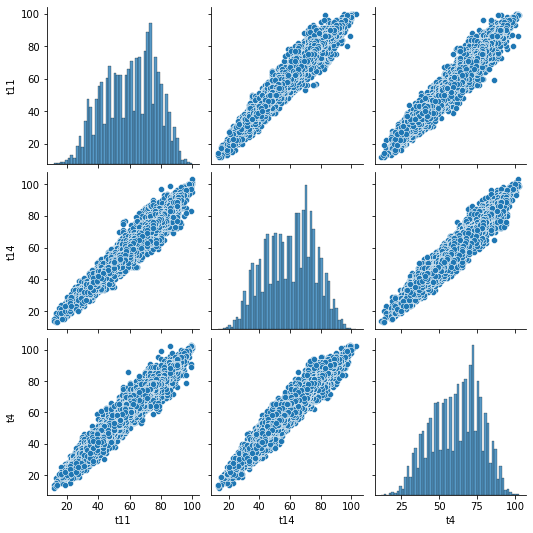

In [65]:
sns.pairplot(temp_data_pivot[['t11', 't14', 't4']])

# Feature Engineering

## select temperature variables

In [66]:
# corr_mat = temp_data_pivot[temp_cols].corr().abs()
# corr_mat_u = corr_mat.where(np.triu(np.ones(corr_mat.shape), k=1).astype(np.bool))
# cols_to_drop = [col for col in corr_mat_u.columns if any(corr_mat_u[col] > 0.98)]
# temp_data_pivot.drop(cols_to_drop, axis=1)
# (corr_mat == 1).sum(axis=1)
# all are unique


def drop_collinear_cols(df, cols, thresh):

    corr_mat = df[cols].corr().abs()
    corr_mat_u = corr_mat.where(np.triu(np.ones(corr_mat.shape), k=1).astype(np.bool))
    cols_to_drop = [col for col in corr_mat_u.columns if any(corr_mat_u[col] > thresh)]
    df = df.drop(cols_to_drop, axis=1)

    return df, cols_to_drop




temp_cols = str_temp_cols_dict.values()
temp_fts, cols_to_drop =  drop_collinear_cols(temp_data_pivot, cols=temp_cols, thresh=0.96)

# compute mean of rest and add on
temp_fts['mean_temp'] = temp_data_pivot[cols_to_drop].mean(axis=1)

str_temp_cols_dict = dict([( col, 't'+str(col)) for col in temp_fts.columns if isinstance(col, int)])

temp_fts.rename(columns=str_temp_cols_dict, inplace=True)
temp_fts.head()


C:\Users\Aroge\AppData\Local\Temp\ipykernel_38920\1669254387.py:12: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  corr_mat_u = corr_mat.where(np.triu(np.ones(corr_mat.shape), k=1).astype(np.bool))


station_id,datetime,t1,t2,t3,t5,t9,t16,mean_temp
0,2005-01-01 01:00:00,43,46,40,48,45,53,46.181818
1,2005-01-01 02:00:00,41,46,38,48,42,53,46.318182
2,2005-01-01 03:00:00,40,46,37,45,43,52,45.272727
3,2005-01-01 04:00:00,39,46,37,48,42,52,45.500000
4,2005-01-01 05:00:00,38,46,37,48,42,51,45.000000


In [67]:
np.all(load_data_raw.datetime == temp_fts.datetime)

True

In [234]:


from pandas.tseries.holiday import USFederalHolidayCalendar as calendar


def is_holiday(data, date_col='datetime'):
    cal = calendar()
    date_series = data[date_col]
    holidays = cal.holidays(start=date_series.min(), end=date_series.max())
    
    data['is_holiday'] = np.int16(date_series.isin(holidays))
    return data


temp_fts.drop(labels=['datetime'], axis=1, inplace=True, errors='ignore')
load_temp = pd.concat([load_data_raw, temp_fts], axis=1)

load_temp = (load_temp.copy()
             .assign(month=load_data_raw.datetime.dt.month)
             .assign(is_weekend=np.uint8(load_data_raw.datetime.dt.day_of_week > 4))
             .pipe(is_holiday, date_col='datetime')
             .assign(temp_s1 = load_temp.mean_temp.shift(1).fillna(method='backfill'))
             .assign(temp_s2 = load_temp.mean_temp.shift(2).fillna(method='backfill'))
             .assign(load_s1 = load_temp.load.shift(1).fillna(method='backfill'))
             .assign(load_s2 = load_temp.load.shift(2).fillna(method='backfill'))
            #  .assign(daylight_hrs= load_temp.datetime.apply(hours_of_daylight))
            #  .assign(day_count=np.arange(0, len(load_temp)) % 365.25)
             .drop_duplicates(subset='datetime')
             .set_index('datetime')
             .drop('date', axis=1)
             )

print(load_temp.columns)
load_temp.head(2)

Index(['hr', 'load', 't1', 't2', 't3', 't5', 't9', 't16', 'mean_temp', 'month',
       'is_weekend', 'is_holiday', 'temp_s1', 'temp_s2', 'load_s1', 'load_s2'],
      dtype='object')


,hr,load,t1,t2,t3,t5,t9,t16,mean_temp,month,is_weekend,is_holiday,temp_s1,temp_s2,load_s1,load_s2
datetime,,,,,,,,,,,,,,,,
2005-01-01 01:00:00,1,156.545,43,46,40,48,45,53,46.181818,1,1,0,46.181818,46.181818,156.545,156.545
2005-01-01 02:00:00,2,147.924,41,46,38,48,42,53,46.318182,1,1,0,46.181818,46.181818,156.545,156.545


## save training data

In [82]:
load_temp.to_csv(path_or_buf='../data/processed/training_data.csv', index=True)

# Modelling

## GAM

In [237]:
ft_list = load_temp.columns.to_list()
ft_list.remove('load')

date_series = load_temp.index.values
# X = load_temp[ft_list].values
# ft_list = ['hr', 'mean_temp', 'month','day_count', 'is_holiday']
X = load_temp[ft_list].values
y = load_temp['load']

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test =  train_test_split(X, y, test_size=0.3, shuffle=False)

split_pt = X_train.shape[0]
print(ft_list)

['hr', 't1', 't2', 't3', 't5', 't9', 't16', 'mean_temp', 'month', 'is_weekend', 'is_holiday', 'temp_s1', 'temp_s2', 'load_s1', 'load_s2']


In [174]:
from pygam import LinearGAM

n_ft = X.shape[1]
lams_space = np.random.uniform(low=1e-3, high=1e3, size=(10, n_ft))

gam = LinearGAM().gridsearch(X_train, y_train, lam=lams_space, progress=False)

In [175]:
print(gam.terms[0])

spline_term


15


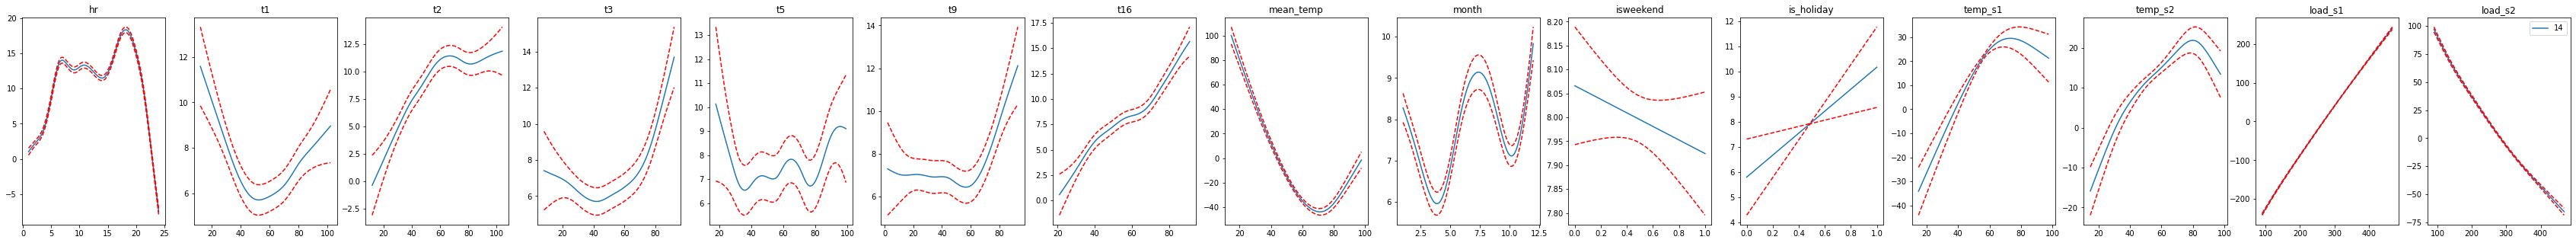

In [176]:

fig, axs = plt.subplots(1, n_ft, figsize=(8*(n_ft/2), 5))


for i, term in enumerate(gam.terms):

    if term.isintercept:
        continue
    try:
        ax = axs[i]
    except TypeError:
        ax = ax
    XX = gam.generate_X_grid(term=i)
    ax.plot(XX[:, i], gam.partial_dependence(term=i, X=XX), label=str(i))
    ax.plot(XX[:, i], gam.partial_dependence(term=i, X=XX, width=.95)[1], c='r', ls='--')
    ax.set_title(ft_list[i])
plt.legend()
print(n_ft)

In [ ]:
gam.summary()

LinearGAM                                                                                                 
=============================================== ==========================================================
Distribution:                        NormalDist Effective DoF:                                     74.0764
Link Function:                     IdentityLink Log Likelihood:                                -88125.0947
Number of Samples:                        18393 AIC:                                           176400.3421
                                                AICc:                                          176400.9658
                                                GCV:                                               47.8989
                                                Scale:                                             47.5518
                                                Pseudo R-Squared:                                   0.9896
Feature Function                  Lam

C:\Users\Aroge\AppData\Local\Temp\ipykernel_45252\3358381670.py:1: UserWarning: KNOWN BUG: p-values computed in this summary are likely much smaller than they should be. 
 
Please do not make inferences based on these values! 

Collaborate on a solution, and stay up to date at: 
github.com/dswah/pyGAM/issues/163 

  gam.summary()


### Inference - Day ahead

0.027080641771238072

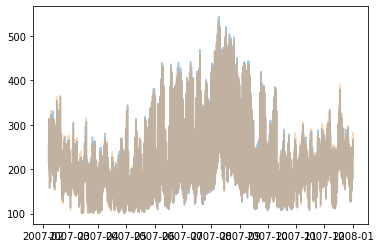

In [177]:
y_hat = gam.predict(X_test)

date_series = load_temp.index

date_series_test = date_series[split_pt:]


fig, ax = plt.subplots()

ax.plot(date_series_test, y_test, alpha=0.4, label='actual')
ax.plot(date_series_test, y_hat, alpha=0.3, label='pred')

from sklearn.metrics import mean_absolute_percentage_error

mean_absolute_percentage_error(y_true=y_test, y_pred=y_hat)

# gam.confidence_intervals(X_test)

#### 1 year inference





- input: get date and temp, 
    - also have access to historical data
- create dataframe of datetime and temp
- clean temp
    - reduce to 6 of them
    - for average check same time last year
- get_date features
- put togetther date and temp
- more datetime feature
    - get same hour period last week
    - get same hour last year
    - rolling a few days behing
- load history features:
    - get load last year same hour
    - get load shifts
    - get rolling load last few days
- temp_features
    - if temp size = 28
        - set as temp and select relevant cols
    - else (it will be 1):
        - get other temperature from same time last year
    - mean temp same hour last year
    - mean temp_lag two hours


In [ ]:
# def feature_prev_year(current_date, n_years_back, feature_name, hist_data):
#     prev_same_time = current_date + pd.DateOffset(years=-n_years_back)

#     # print(prev_same_time)
#     # solve dst time in prev
#     try:
#         prev_val = hist_data.loc[prev_same_time, feature_name]
#     except KeyError:
#         prev_val = hist_data.loc[prev_same_time+pd.DateOffset(hours=1), feature_name]

#     return prev_val



# # inputs
# start_date = '2008-01-01'
# future_dates = pd.date_range(start=start_date, end='2009-01-01', freq='h', inclusive='left')+ pd.DateOffset(hours=1)
# datetime_val = future_dates 
# temp_vals = np.random.randint(low=0, high=1, size=(len(datetime_val)))



# full_temp_entered = False
# if temp_vals.ndim == 2:
#     full_temp_entered = True
#     temp_cols = list(np.arange(1, temp_vals.shape[-1]+1))
#     temp_cols = [str(item) for item in temp_cols]
# else:
#     temp_cols = 'mean_temp'

# #init dataframe
# cols = ['datetime'].append(temp_cols)
# feature_df = pd.DataFrame({}, columns=cols)
# feature_df['datetime'] = datetime_val
# feature_df[temp_cols] = temp_vals

# # remove leap days
# feature_df = feature_df[~((feature_df.datetime.dt.month == 2) & (feature_df.datetime.dt.day== 29))]

# if full_temp_entered:
#     feature_df['mean_temp'] = feature_df[cols_to_drop].mean(axis=1)
#     feature_df.drop(cols_to_drop, axis=1, inplace=True, errors='ignore')
#     print(cols_to_drop)
# else:
#     # get temps from old
#     # pass
#     # TODO: move this as one of feature eng constants
#     old_temp_cols_to_retrieve = list(str_temp_cols_dict.values())
#     old_temp_cols_to_retrieve
#     for name in old_temp_cols_to_retrieve:
#         col = {name: feature_df.datetime.apply(feature_prev_year, n_years_back=1, 
#                                      feature_name=name, hist_data=load_temp)}
#         feature_df = feature_df.assign(**col)


# def get_month(df, col_name):
    
#     months = df.datetime.dt.month
#     return months



# print(feature_df)
# # engineer new features
# # if isinstance(datetime_val, list):
        
# from src import feature_funcs
# from src.utils import Pipe

# feature_eng_fns = [feature_funcs.get_month, feature_funcs.get_hr, feature_funcs.is_holiday,
#                    feature_funcs.is_weekend, feature_funcs.temp_lag_1hr,
#                    feature_funcs.temp_lag_2hr]

# feat_pipe = Pipe(fns=feature_eng_fns)

# feat_pipe.run()

                datetime  mean_temp  t1  t2  t3  t5  t9  t16
0    2008-01-01 01:00:00          0  53  66  59  68  57   65
1    2008-01-01 02:00:00          0  53  66  59  68  56   65
2    2008-01-01 03:00:00          0  52  72  56  68  55   65
3    2008-01-01 04:00:00          0  52  72  56  70  54   66
4    2008-01-01 05:00:00          0  52  72  54  70  54   65
...                  ...        ...  ..  ..  ..  ..  ..  ...
8779 2008-12-31 20:00:00          0  41  39  39  50  37   46
8780 2008-12-31 21:00:00          0  37  37  35  45  30   48
8781 2008-12-31 22:00:00          0  39  36  34  41  37   49
8782 2008-12-31 23:00:00          0  36  37  32  37  37   49
8783 2009-01-01 00:00:00          0  44  37  32  37  39   48

[8760 rows x 8 columns]


In [73]:
def feature_prev_year(current_date, n_years_back, feature_name, hist_data):
    prev_same_time = current_date + pd.DateOffset(years=-n_years_back)

    # print(prev_same_time)
    # solve dst time in prev
    try:
        prev_val = hist_data.loc[prev_same_time, feature_name]
    except KeyError:
        prev_val = hist_data.loc[prev_same_time+pd.DateOffset(hours=1), feature_name]

    return prev_val

def get_feat_prev_hr(current_datetime, n_hrs_back, feature_name, past_data):
    prev_datetime = current_datetime + pd.DateOffset(hours=-n_hrs_back)
    try:
        prev_val = past_data.loc[prev_datetime, feature_name]
    except KeyError:
        prev_val = past_data.loc[prev_datetime+pd.DateOffset(hours=-1), feature_name]

    return prev_val

In [74]:

# inputs
start_date = '2008-01-01'
future_dates = pd.date_range(start=start_date, end='2009-01-01', freq='h', inclusive='left')+ pd.DateOffset(hours=1)
datetime_vals = future_dates 
temp_vals = np.random.randint(low=0, high=10, size=(len(datetime_vals), 28))

# constants
cols_to_drop = cols_to_drop
past_data = load_temp

full_temp_entered = False
if temp_vals.ndim == 2:
    full_temp_entered = True



## multi-output inference

In [267]:
past_data = pd.read_csv(filepath_or_buffer='../data/processed/training_data.csv', parse_dates=[0], index_col='datetime')


def feature_prev_year(current_date, n_years_back, feature_name, hist_data):
    prev_same_time = current_date + pd.DateOffset(years=-n_years_back)

    # print(prev_same_time)
    # solve dst time in prev
    try:
        prev_val = hist_data.loc[prev_same_time, feature_name]
    except KeyError:
        prev_val = hist_data.loc[prev_same_time+pd.DateOffset(hours=1), feature_name]

    return prev_val

def get_feat_prev_hr(current_datetime, n_hrs_back, feature_name, past_data):
    prev_datetime = current_datetime + pd.DateOffset(hours=-n_hrs_back)
    try:
        prev_val = past_data.loc[prev_datetime, feature_name]
    except KeyError:
        prev_val = past_data.loc[prev_datetime+pd.DateOffset(hours=-1), feature_name]

    return prev_val

def change_col_names(df:pd.DataFrame):
    df.columns = ['date', 'hr', 'station_id', 'temperature']
    return df

def make_datetime(df:pd.DataFrame):
    df['datetime'] = df.date + pd.to_timedelta(df.hr, unit='h')
    return df

def make_station_cols(df):
    df['dummy_col_01'] = np.arange(len(df)) % 2
    df = pd.pivot_table(df, values='temperature', index=['date', 'hr','datetime', 'dummy_col_01'], columns='station_id')
    df.reset_index(inplace=True)
    df.drop(labels=['dummy_col_01', 'date', 'hr'], axis=1, inplace=True)
    str_temp_cols_dict = dict([( col, 't'+str(col)) for col in temp_data_pivot.columns if isinstance(col, int)])
    temp_data_pivot.rename(columns=str_temp_cols_dict, inplace=True)
    return df

def init_df(dates, temps):
    
    if temps.ndim == 2: #  multiple temps for one data point
        temp_cols = list(np.arange(1, temps.shape[-1]+1))
        temp_cols = ['t'+str(item) for item in temp_cols]
    else:
        temp_cols = 'mean_temp'

    #init dataframe
    cols = ['datetime'].append(temp_cols)
    feature_df = pd.DataFrame({}, columns=cols)
    feature_df['datetime'] = dates
    print(temp_cols, temps)
    feature_df[temp_cols] = temps
    return feature_df

def remove_leap_days(df):
    
    df = df[~((df.datetime.dt.month == 2) & (df.datetime.dt.day== 29))]
    return df

def set_temp_cols(df):
    if full_temp_entered:
        df['mean_temp'] = df[cols_to_drop].mean(axis=1)
        df.drop(cols_to_drop, axis=1, inplace=True, errors='ignore')
    else: # retrieve from old data
        select_temp_cols = list(set(list(str_temp_cols_dict.values())) - set(cols_to_drop))

        for name in select_temp_cols:
            # col = {name: feature_df.datetime.apply(feature_prev_year, n_years_back=1, 
            #                             feature_name=name, hist_data=past_data)}
            # feature_df = feature_df.assign(**col)     
            vals =  df.datetime.apply(feature_prev_year, n_years_back=1, 
                                        feature_name=name, hist_data=past_data)
            df[name] = vals
    return df

future_temps = pd.read_csv('../data/raw_data/temp_hist.csv', parse_dates=[0])
future_temps = future_temps[future_temps['Date'] >='2008']

# transform input temperature
temp_proc_pipe = Pipe([change_col_names,
                       make_datetime,
                       make_station_cols])
df = temp_proc_pipe.run_input(input=future_temps)

future_dates = df.datetime.values
future_temps = df.loc[:, 1].values

# initialize input
# input will start from here
full_temp_entered = False
if future_dates.ndim == 2:
    full_temp_entered = True
df = init_df(dates=future_dates, temps=future_temps)

feat_pipe = Pipe(fns=[set_temp_cols, feature_funcs.get_month, feature_funcs.get_hr, feature_funcs.is_holiday,
                   feature_funcs.is_weekend, feature_funcs.temp_lag_1hr,
                   feature_funcs.temp_lag_2hr])
df = feat_pipe.run_input(input=df)
df.set_index('datetime', inplace=True)
print(df.shape)

# sort columns
inf_time_cols = ['load_s1', 'load_s2']
pre_inf_time_cols = [name for name in ft_list if name not in inf_time_cols]
pre_inf_time_cols
df = df[pre_inf_time_cols]

df.head(3)

# df = df[7300:].copy()


mean_temp [46 45 43 ... 34 32 28]
(8784, 13)


,hr,t1,t2,t3,t5,t9,t16,mean_temp,month,is_weekend,is_holiday,temp_s1,temp_s2
datetime,,,,,,,,,,,,,
2008-01-01 01:00:00,1,53,66,59,68,57,65,46,1,0,0,46.0,46.0
2008-01-01 02:00:00,2,53,66,59,68,56,65,45,1,0,0,46.0,46.0
2008-01-01 03:00:00,3,52,72,56,68,55,65,43,1,0,0,45.0,46.0


In [276]:
prev_1hr

Timestamp('2008-12-31 23:00:00')

In [301]:
a = pd.to_datetime('2008-11-02 02:00:00')
# df[df.index==a].iloc[0]['hr']
isinstance(df.loc[a, 'hr'], pd.Series)


True

In [302]:
def get_hr_ft(lookup_dt, feature_name, pred_data, past_data):

    if lookup_dt >= pred_data.index.values[0]:
        try:
            prev_val = pred_data.loc[lookup_dt, feature_name]
            # prev_val = pred_data[pred_data.index==lookup_dt].iloc[0][feature_name]
        except KeyError:
            lookup_dt = lookup_dt + pd.DateOffset(hours=-1)
            # prev_val = pred_data.loc[lookup_dt, feature_name]
            return get_hr_ft(lookup_dt, feature_name, pred_data, past_data)
            # print('b', lookup_dt)

    else:
        try:
            prev_val = past_data.loc[lookup_dt, feature_name]
            # prev_val = past_data[past_data.index==lookup_dt].iloc[0][feature_name]
        except KeyError:
            prev_val = past_data.loc[lookup_dt+pd.DateOffset(hours=-1), feature_name]
            # prev_val = past_data[past_data.index==lookup_dt+pd.DateOffset(hours=-1)].iloc[0][feature_name]

    if isinstance(prev_val, pd.Series):
        prev_val = prev_val[0]

    return prev_val

pred_data = pd.DataFrame({'datetime':df.index.values,
                          'load':pd.NA})
pred_data.set_index('datetime', inplace=True)

for i in range(len(df[:])):

    curr_datetime = df.index[i]

    # inference time features
    prev_1hr = curr_datetime + pd.DateOffset(hours=-1)
    prev_2hr = curr_datetime + pd.DateOffset(hours=-2)
    prev_1yr = curr_datetime + pd.DateOffset(years=-1)

    load_prev_1h = get_hr_ft(prev_1hr, 'load', pred_data=pred_data, past_data=past_data)
    load_prev_2h = get_hr_ft(prev_2hr, 'load', pred_data=pred_data, past_data=past_data)
    load_prev_1yr = get_hr_ft(prev_1yr, 'load', pred_data=pred_data, past_data=past_data)

    try:
        assert isinstance(load_prev_1h, float)
    except AssertionError:
        print(load_prev_1h)
        print(i)

    features = df.iloc[i, :].values
    features = np.append(features, [load_prev_1h, load_prev_2h])
    features = features.reshape(1, -1)
    # features.loc['load_s1'] = load_prev_1h
    # features.loc['load_s2'] = load_prev_2h
    # features = features.values.reshape(1, -1)

    try:
        pred = gam.predict(features)
    except:
        print(features)

    pred_data.iloc[i]  = pred[0]



In [303]:
pred_data.load.isna().sum()

0

<AxesSubplot:xlabel='datetime'>

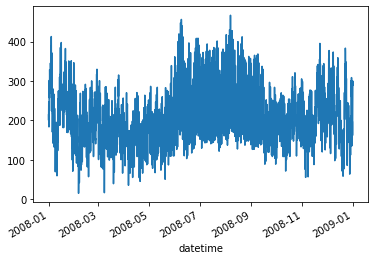

In [304]:
pred_data.load.isna().mean()
pred_data.load.plot()

<AxesSubplot:xlabel='datetime'>

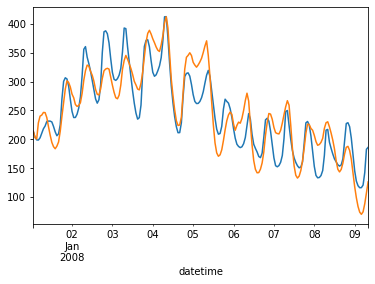

In [310]:
actual_vals = pd.read_csv('../data/eval_data/Solution.csv', parse_dates=[0])
actual_vals['datetime'] = actual_vals.Date + pd.to_timedelta(actual_vals.Hour, unit='h')
actual_vals.set_index('datetime', inplace=True)
actual_vals.Load[:200].plot()
pred_data.load[:200].plot()

In [306]:
from sklearn.metrics import mean_absolute_percentage_error

mean_absolute_percentage_error(y_true=actual_vals.Load, y_pred=pred_data.load)

0.1363014363644661

## DNN

In [308]:
ft_list = load_temp.columns.to_list()
ft_list.remove('load')
ft_list = ft_list + ['load']
print(ft_list)

date_series = load_temp.index.values
input_data = load_temp[ft_list].values


from sklearn.preprocessing import MinMaxScaler


scaler = MinMaxScaler(feature_range=(0,1)).fit(input_data)
input_data = scaler.transform(input_data)
input_data[0]
print(input_data.shape)

['hr', 1, 2, 3, 5, 9, 16, 'mean_temp', 'month', 'isweekend', 'is_holiday', 'temp_s1', 'temp_s2', 'load_s1', 'load_s2', 'load']
(26277, 16)


In [309]:
def train_val_split(time, series, split_time):

    time_train = time[:split_time]
    series_train = series[:split_time]
    time_valid = time[split_time:]
    series_valid = series[split_time:]

    return time_train, series_train, time_valid, series_valid

In [310]:
from sklearn.model_selection import train_test_split

date_train, date_test, series_train, series_test =  train_test_split(date_series, input_data, 
                                                                     test_size=0.3, shuffle=False)


In [311]:
split_pt = series_train.shape[0]

In [312]:
def window_dataset(data, window_size, batch_size, shuffle_buffer_size):

    ds = tf.data.Dataset.from_tensor_slices(data)
    ds = ds.window(size=window_size+1, shift=1, drop_remainder=True)
    ds = ds.flat_map(map_func=lambda x: x.batch(window_size+1))
    # ds = ds.shuffle(buffer_size=shuffle_buffer_size)
    ds = ds.map(map_func=lambda x: (x[:-1], x[-1,-1]))
    ds = ds.batch(batch_size=batch_size).prefetch(1)
    return ds

window_size = 32
shuffle_buffer_sz = int(len(input_data) * 0.5)
batch_size = 32

train_set = window_dataset(series_train, window_size, batch_size, shuffle_buffer_sz)
val_set = window_dataset(series_test, window_size, batch_size, shuffle_buffer_sz)

In [86]:


# ds = tf.data.Dataset.from_tensor_slices(series_train)
# ds = ds.window(size=window_size+1, shift=1, drop_remainder=True)
# ds = ds.flat_map(map_func=lambda x: x.batch(window_size+1))
# # ds = ds.shuffle(buffer_size=shuffle_buffer_sz)
# ds = ds.map(map_func=lambda x: (x[:-1], x[-1,-1]))
# ds = ds.batch(batch_size=batch_size).prefetch(1)



# Model Architecture

In [313]:
def create_uncompiled_model():

    ### START CODE HERE

    input_shape = [window_size, series_train.shape[-1]]
    
    model = tf.keras.models.Sequential([
      tf.keras.layers.Conv1D(filters=64, kernel_size=12,
                          strides=1,
                          activation="relu",
                          padding='causal',
                          input_shape=input_shape),
      tf.keras.layers.LSTM(64, return_sequences=True),
      tf.keras.layers.LSTM(64, return_sequences=True),
      tf.keras.layers.LSTM(32),
      tf.keras.layers.Dense(32, activation="relu"),
      tf.keras.layers.Dense(16, activation="relu"),
      tf.keras.layers.Dense(8, activation="relu"),
      tf.keras.layers.Dense(1),
    ])

    ### END CODE HERE

    return model

In [314]:
uncompiled_model = create_uncompiled_model()

# Get one batch of the training set(X = input, y = label)
for X, y in train_set.take(1):
    
    # Generate a prediction
    print(f'Testing model prediction with input of shape {X.shape}...')
    y_pred = uncompiled_model.predict(X)
    
# Compare the shape of the prediction and the label y (remove dimensions of size 1)
y_pred_shape = y_pred.squeeze().shape

assert y_pred_shape == y.shape, (f'Squeezed predicted y shape = {y_pred_shape} '
                                           f'whereas actual y shape = {y.shape}.')

print("Your current architecture is compatible with the windowed dataset! :)")

Testing model prediction with input of shape (32, 32, 16)...
1/1 [==============================] - 8s 8s/step
Your current architecture is compatible with the windowed dataset! :)


In [315]:
def adjust_learning_rate(dataset):
    
    model = create_uncompiled_model()
    
    lr_schedule = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-5 * 10**(epoch / 20))
    
    ### START CODE HERE
    
    # Select your optimizer
    # optimizer = tf.keras.optimizers.SGD(momentum=0.9)
    optimizer = tf.keras.optimizers.Adam()

    
    # Compile the model passing in the appropriate loss
    model.compile(loss=tf.keras.losses.Huber(),
                  optimizer=optimizer, 
                  metrics=["mae"]) 
    
    ### END CODE HERE
    
    history = model.fit(dataset, epochs=50, callbacks=[lr_schedule])
    
    return history

# Run the training with dynamic LR
lr_history = adjust_learning_rate(train_set)

Epoch 1/50
574/574 [==============================] - 13s 13ms/step - loss: 0.0121 - mae: 0.1200 - lr: 1.0000e-05
Epoch 2/50
574/574 [==============================] - 8s 14ms/step - loss: 0.0099 - mae: 0.1109 - lr: 1.1220e-05
Epoch 3/50
574/574 [==============================] - 8s 14ms/step - loss: 0.0077 - mae: 0.0978 - lr: 1.2589e-05
Epoch 4/50
574/574 [==============================] - 8s 14ms/step - loss: 0.0060 - mae: 0.0871 - lr: 1.4125e-05
Epoch 5/50
574/574 [==============================] - 8s 14ms/step - loss: 0.0047 - mae: 0.0777 - lr: 1.5849e-05
Epoch 6/50
574/574 [==============================] - 8s 15ms/step - loss: 0.0038 - mae: 0.0698 - lr: 1.7783e-05
Epoch 7/50
574/574 [==============================] - 8s 14ms/step - loss: 0.0035 - mae: 0.0659 - lr: 1.9953e-05
Epoch 8/50
574/574 [==============================] - 8s 14ms/step - loss: 0.0033 - mae: 0.0642 - lr: 2.2387e-05
Epoch 9/50
574/574 [==============================] - 8s 14ms/step - loss: 0.0032 - mae: 0.0629

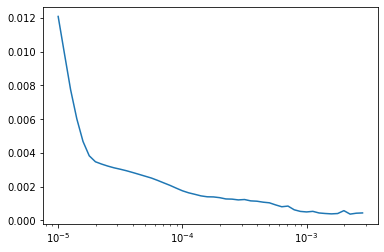

In [316]:
import matplotlib.pyplot as plt
plt.semilogx(lr_history.history["lr"], lr_history.history["loss"])

## Compile Model

In [317]:
def create_model():

    
    model = create_uncompiled_model()

    ### START CODE HERE
    
    optimizer = tf.keras.optimizers.Adam(learning_rate=1e-4)
    
    model.compile(loss=tf.keras.losses.Huber(),
                  optimizer=optimizer,
                  metrics=["mae"])  
    

    ### END CODE HERE

    return model

# Save an instance of the model
model = create_model()

es_callback = tf.keras.callbacks.EarlyStopping(monitor="val_loss", min_delta=0, patience=5)

# Train it
history = model.fit(train_set, validation_data=val_set, epochs=100, callbacks=[es_callback])
# history = model.fit(train_set, validation_data=val_set, epochs=10)

Epoch 1/100
574/574 [==============================] - 15s 20ms/step - loss: 0.0093 - mae: 0.1058 - val_loss: 0.0156 - val_mae: 0.1424
Epoch 2/100
574/574 [==============================] - 10s 17ms/step - loss: 0.0071 - mae: 0.0933 - val_loss: 0.0145 - val_mae: 0.1197
Epoch 3/100
574/574 [==============================] - 10s 17ms/step - loss: 0.0041 - mae: 0.0713 - val_loss: 0.0119 - val_mae: 0.1099
Epoch 4/100
574/574 [==============================] - 10s 17ms/step - loss: 0.0034 - mae: 0.0647 - val_loss: 0.0078 - val_mae: 0.0921
Epoch 5/100
574/574 [==============================] - 10s 18ms/step - loss: 0.0031 - mae: 0.0613 - val_loss: 0.0061 - val_mae: 0.0823
Epoch 6/100
574/574 [==============================] - 10s 18ms/step - loss: 0.0027 - mae: 0.0572 - val_loss: 0.0050 - val_mae: 0.0746
Epoch 7/100
574/574 [==============================] - 10s 18ms/step - loss: 0.0024 - mae: 0.0539 - val_loss: 0.0043 - val_mae: 0.0693
Epoch 8/100
574/574 [==============================] - 

# Model Evaluation

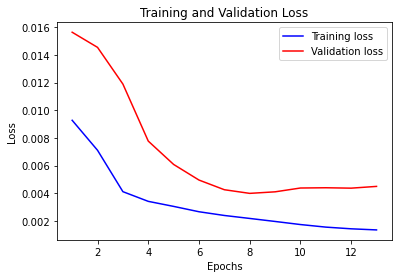

In [327]:
def visualize_loss(history, title):
    loss = history.history["loss"]
    val_loss = history.history["val_loss"]
    epochs = np.arange(len(loss)) + 1
    plt.figure()
    plt.plot(epochs, loss, "b", label="Training loss")
    plt.plot(epochs, val_loss, "r", label="Validation loss")
    plt.title(title)
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.legend()
    plt.show()


visualize_loss(history, "Training and Validation Loss")

In [205]:
lstm_model_0_dir =  '../models/lstm_model_0'
model.save(lstm_model_0_dir)


INFO:tensorflow:Assets written to: ../models/lstm_model_0\assets


INFO:tensorflow:Assets written to: ../models/lstm_model_0\assets


In [319]:
def compute_metrics(true_series, forecast):
    
    mse = tf.keras.metrics.mean_squared_error(true_series, forecast).numpy()
    mae = tf.keras.metrics.mean_absolute_error(true_series, forecast).numpy()
    mape = tf.keras.metrics.MeanAbsolutePercentageError(true_series, forecast).numpy()

    return mse, mae, mape

def model_forecast(model, series, window_size):
    ds = tf.data.Dataset.from_tensor_slices(series)
    ds = ds.window(window_size, shift=1, drop_remainder=True)
    ds = ds.flat_map(lambda w: w.batch(window_size))
    ds = ds.batch(batch_size).prefetch(1)
    forecast = model.predict(ds)
    return forecast, ds

In [222]:
input_data.shape, date_train.shape, series_train.shape, forecast.shape

((26277, 30), (18393,), (18393, 30), (26246,))

In [214]:
series_test.shape

(7884, 30)

In [320]:


forecast, ds = model_forecast(model, input_data, window_size)
forecast = forecast.squeeze()

821/821 [==============================] - 7s 7ms/step


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


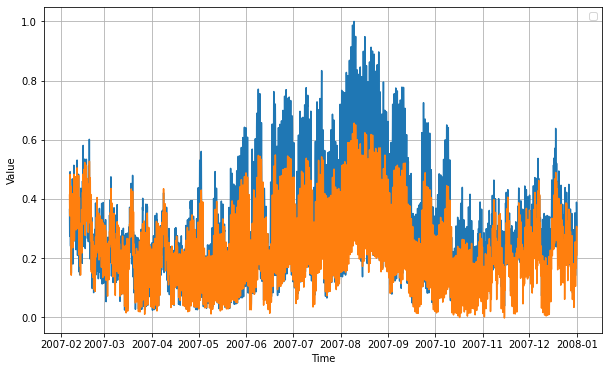

In [321]:
plt.figure(figsize=(10, 6))

def plot_series(time, series, label=None, format="-", start=0, end=None):
    plt.plot(time[start:end], series[start:end], format, label=label)
    plt.xlabel("Time")
    plt.ylabel("Value")
    plt.grid(True)
    plt.legend()

plot_series(date_test, series_test[:,-1])
plot_series(date_test, forecast[split_pt-window_size:-1])

In [322]:
forecast, ds = model_forecast(model, input_data[split_pt-window_size:], window_size)
forecast = forecast.squeeze()
print(forecast.shape)

247/247 [==============================] - 2s 7ms/step
(7885,)


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


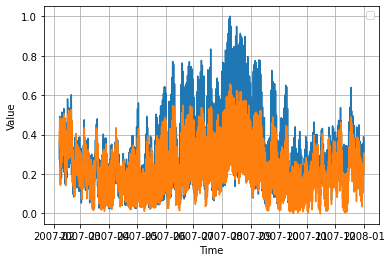

In [323]:
plot_series(date_test, series_test[:,-1])
plot_series(date_test, forecast[:-1])

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


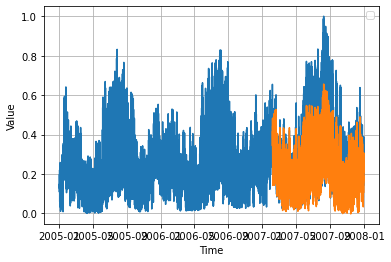

In [324]:
plot_series(date_series, input_data[:,-1])
plot_series(date_test, forecast[:-1])

## multi-output

In [330]:


temp_data_future  = pd.read_csv(temp_data_path, parse_dates=[0])
temp_data_future = temp_data_future[temp_data_future.Date >= '2008']

temp_data_future.columns = ['date', 'hr', 'station_id', 'temperature']
temp_data_future['datetime'] = temp_data_future.date + pd.to_timedelta(temp_data_future.hr, unit='h')

temp_data_future_pivot = pd.pivot_table(temp_data_future, values='temperature', index=['date', 'hr','datetime'], columns='station_id')
temp_data_future_pivot.reset_index(inplace=True)

temp_data_future_pivot.drop(['date', 'hr'], axis=1, inplace=True)
print(temp_data_future_pivot.shape)

holidays = cal.holidays(start=temp_data_future_pivot.datetime.min(), end=temp_data_future_pivot.datetime.max())
temp_data_future_pivot['is_holiday'] = np.int16(temp_data_future_pivot.datetime.dt.date.isin(holidays))
temp_data_future_pivot.set_index(keys='datetime', inplace=True)

feature_list_f = list(np.arange(1, n_stations+1)) + ['is_holiday']
date_series_f = temp_data_future_pivot.index.values
input_data_f = temp_data_future_pivot[feature_list_f].values

scaler = MinMaxScaler(feature_range=(0,1)).fit(input_data_f)
input_data_f = scaler.transform(input_data_f)

future_len = len(input_data_f)

input_data_f = np.concatenate((input_data_f, np.zeros(shape=(future_len, 1)) ), axis=1)

temp_data_future_pivot.head(2)

(8783, 29)


c:\Users\Aroge\anaconda3\envs\t-series-tf\lib\site-packages\pandas\core\algorithms.py:521: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  return f(comps, values)


station_id,1,2,3,4,5,6,7,8,9,10,...,20,21,22,23,24,25,26,27,28,is_holiday
datetime,,,,,,,,,,,,,,,,,,,,,
2008-01-01 01:00:00,46.0,36.0,33.0,40.0,41.0,47.0,36.0,40.0,39.0,39.0,...,49.0,32.0,37.0,37.0,43.0,37.0,37.0,45.0,34.0,0
2008-01-01 02:00:00,45.0,36.0,31.0,36.0,41.0,46.0,37.0,39.0,44.0,35.0,...,47.0,30.0,36.0,39.0,42.0,37.0,36.0,42.0,35.0,0


In [331]:
print(input_data_f.shape)
input_data_f[:2]

(8783, 30)


array([[0.37209302, 0.24096386, 0.28571429, 0.29761905, 0.28395062,
        0.37349398, 0.24096386, 0.28915663, 0.40909091, 0.27058824,
        0.28395062, 0.25      , 0.34146341, 0.32941176, 0.29761905,
        0.31343284, 0.30487805, 0.30120482, 0.35632184, 0.3880597 ,
        0.26136364, 0.27710843, 0.26829268, 0.28205128, 0.25      ,
        0.26436782, 0.3373494 , 0.21428571, 0.        , 0.        ],
       [0.36046512, 0.24096386, 0.26190476, 0.25      , 0.28395062,
        0.36144578, 0.25301205, 0.27710843, 0.46590909, 0.22352941,
        0.2962963 , 0.225     , 0.34146341, 0.27058824, 0.27380952,
        0.29850746, 0.29268293, 0.31325301, 0.31034483, 0.35820896,
        0.23863636, 0.26506024, 0.29268293, 0.26923077, 0.25      ,
        0.25287356, 0.30120482, 0.22619048, 0.        , 0.        ]])

In [293]:
input_data.shape, temp_data_future_pivot.shape

((26277, 30), (8783, 29))

In [307]:

# input_X = input_data[-window_size:, :]

# input_X = np.reshape(input_X, newshape=(1, input_X.shape[0], input_X.shape[1]))
# print(model(input_X).numpy().squeeze())

pred_s = []

input_X_series = np.concatenate((input_data[-window_size:, :], input_data_f), axis=0)

pred_out_sz = input_data_f.shape[0]

for i in range(pred_out_sz):

    input_w = input_X_series[i:window_size+i]

    # put in last prediction in features for subsequent predictions
    # first prediction has the right inputs
    if i != 0:
        input_w[-1, -1] = pred_s[-1]
    
    input_w = np.reshape(input_w, newshape=(1, input_w.shape[0], input_w.shape[1]))
    # print(model(input_X))
    pred = model(input_w).numpy().squeeze()

    pred_s.append(pred)

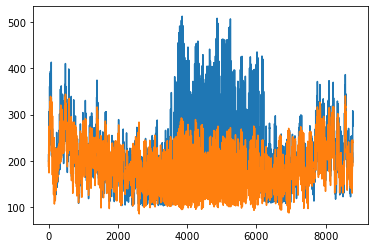

In [360]:
soln_data = pd.read_csv('../data/eval_data/Solution.csv', parse_dates=[0])

soln_data['datetime'] = soln_data.Date + pd.to_timedelta(soln_data.Hour, unit='h')
soln_data.datetime.value_counts()


load_temp_f = input_data_f.copy()
load_temp_f[:, -1] = np.array(pred_s)
load_temp_f = scaler.inverse_transform(load_temp_f)

plt.plot(soln_data.Load)
plt.plot(load_temp_f[:, -1])

In [326]:
soln_data.shape, temp_data_future_pivot.shape

((8784, 4), (8783, 29))

In [328]:
temp_data_future_pivot.index.value_counts()

2008-01-01 01:00:00    1
2008-09-01 04:00:00    1
2008-08-31 22:00:00    1
2008-08-31 23:00:00    1
2008-09-01 00:00:00    1
                      ..
2008-05-01 19:00:00    1
2008-05-01 18:00:00    1
2008-05-01 17:00:00    1
2008-05-01 16:00:00    1
2009-01-01 00:00:00    1
Name: datetime, Length: 8783, dtype: int64

In [321]:
temp_data_future.datetime.value_counts()

2008-11-02 02:00:00    56
2008-01-01 01:00:00    28
2008-09-01 04:00:00    28
2008-08-31 22:00:00    28
2008-08-31 23:00:00    28
                       ..
2008-05-01 19:00:00    28
2008-05-01 18:00:00    28
2008-05-01 17:00:00    28
2008-05-01 16:00:00    28
2009-01-01 00:00:00    28
Name: datetime, Length: 8783, dtype: int64

In [322]:
temp_data_raw.datetime.value_counts()

2006-10-29 02:00:00    56
2007-11-04 02:00:00    56
2005-10-30 02:00:00    56
2005-01-01 01:00:00    28
2006-12-31 21:00:00    28
                       ..
2005-12-31 23:00:00    28
2005-12-31 22:00:00    28
2005-12-31 21:00:00    28
2005-12-31 20:00:00    28
2008-01-01 00:00:00    28
Name: datetime, Length: 26277, dtype: int64

In [330]:
temp_data_pivot.datetime.value_counts()

2005-01-01 01:00:00    1
2006-12-31 21:00:00    1
2007-01-01 07:00:00    1
2007-01-01 06:00:00    1
2007-01-01 05:00:00    1
                      ..
2005-12-31 23:00:00    1
2005-12-31 22:00:00    1
2005-12-31 21:00:00    1
2005-12-31 20:00:00    1
2008-01-01 00:00:00    1
Name: datetime, Length: 26277, dtype: int64

In [333]:
a = temp_data_raw[0]
temp_data_pivot = pd.pivot_table(temp_data_raw, values='temperature', index=['date', 'hr','datetime'], columns='station_id')
temp_data_pivot.head()

station_id                           1     2     3     4     5     6     7   \
date       hr datetime                                                        
2005-01-01 1  2005-01-01 01:00:00  43.0  46.0  40.0  47.0  48.0  46.0  44.0   
           2  2005-01-01 02:00:00  41.0  46.0  38.0  46.0  48.0  45.0  51.0   
           3  2005-01-01 03:00:00  40.0  46.0  37.0  45.0  45.0  45.0  49.0   
           4  2005-01-01 04:00:00  39.0  46.0  37.0  47.0  48.0  48.0  45.0   
           5  2005-01-01 05:00:00  38.0  46.0  37.0  44.0  48.0  49.0  43.0   

station_id                           8     9     10  ...    19    20    21  \
date       hr datetime                               ...                     
2005-01-01 1  2005-01-01 01:00:00  52.0  45.0  42.0  ...  39.0  50.0  43.0   
           2  2005-01-01 02:00:00  50.0  42.0  41.0  ...  41.0  49.0  43.0   
           3  2005-01-01 03:00:00  48.0  43.0  40.0  ...  43.0  50.0  41.0   
           4  2005-01-01 04:00:00  50.0  42.0  39.0  ...  43.0  49.0  41.0   
           5  2005-01-01 05:00:00  50.0  42.0  38.0  ...  43.0  49.0  39.0   

station_id                           22    23    24    25    26    27    28  
date       hr datetime                                                       
2005-01-01 1  2005-01-01 01:00:00  45.0  50.0  47.0  41.0  47.0  47.0  45.0  
           2  2005-01-01 02:00:00  46.0  47.0  47.0  45.0  47.0  47.0  45.0  
           3  2005-01-01 03:00:00  45.0  45.0  46.0  45.0  46.0  46.0  43.0  
           4  2005-01-01 04:00:00  43.0  45.0  44.0  45.0  47.0  47.0  44.0  
           5  2005-01-01 05:00:00  43.0  43.0  45.0  45.0  47.0  46.0  44.0  

[5 rows x 28 columns]

In [342]:
np.array(pred_s).reshape((-1, 1))

array([[0.24131413],
       [0.21474975],
       [0.21383303],
       ...,
       [0.33004126],
       [0.33115205],
       [0.3399243 ]], dtype=float32)

In [356]:
load_temp_f.shape, input_data_f.shape

((8783, 31), (8783, 30))

In [358]:
load_temp_f = input_data_f.copy()
load_temp_f[:, -1] = np.array(pred_s)
load_temp_f = scaler.inverse_transform(load_temp_f)

plt.plot(soln_data.Load)
plt.plot(load_temp_f[:, -1])